In [1]:
import pandas as pd 
import numpy as np

In [2]:
def normalization(df, var):

    xmin = df[var].min()
    xmax = df[var].max()

    norm = df[var].apply(lambda x: (x-xmin)/(xmax - xmin))
    return norm

In [3]:
folder = r"D:\Project\Climate-Change-Risk-on-Rural-Population\data\exposure"

## Rural Population

In [4]:
# population data in 2022
population = pd.read_excel(fr'{folder}\population\population_by_area.xlsx',
                           sheet_name='Data')

In [5]:
population = population.rename(columns={
    'Provinsi':'Province', 'Perkotaan (L)':'City (M)', 'Perkotaan (P)':'City (W)', 'Perkotaan (T)':'City (T)',
    'Pedesaan (L)':'Rural (M)','Pedesaan (P)':'Rural (W)', 'Pedesaan (T)':'Rural (T)', 'Total (L)': 'Total (M)',
    'Total (P)':'Total (W)'
})

In [6]:
population.loc[:, '% Rural (T)'] = population['Rural (T)'] / population['Total']
population.loc[:, '% Rural (M)'] = population['Rural (M)'] / population['Total (M)']
population.loc[:, '% Rural (W)'] = population['Rural (W)'] / population['Total (W)']

In [7]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kepulauan Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}

In [8]:
population['Province'] = population['Province'].apply(lambda x: province_map[x])

In [9]:
population.loc[:, 'E3'] = normalization(population, '% Rural (T)')

In [10]:
E3 = population.copy()

In [ ]:
E3.to_csv(r'data\processed\E3_RuralPopulation.csv')

## Agriculture GDP

In [12]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kep. Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'D K I Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'D I Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}

In [13]:
import pandas as pd
from pathlib import Path

types = [
    'Agricultural Services',
    'Estate Crops',
    'Fisheries',
    'Food Crops',
    'Forestry',
    'Horticultural Crops',
    'Livestock'
]

gdp_cols = [str(c) for c in range(2010, 2026)]
df = {}

gdp_dir = Path(folder) / "gdp"

# mapping type → filename
file_map = {
    'Agricultural Services': 'gdp_agricultural_services.xlsx',
    'Estate Crops': 'gdp_estate_crops.xlsx',
    'Fisheries': 'gdp_fisheries.xlsx',
    'Food Crops': 'gdp_food_crops.csv',
    'Forestry': 'gdp_forestry.xlsx',
    'Horticultural Crops': 'gdp_horticultural.csv',
    'Livestock': 'gdp_livestocks.xlsx'
}

for t in types:
    file_path = gdp_dir / file_map[t]

    if file_path.suffix == ".csv":
        open_data = pd.read_csv(file_path)
    else:
        open_data = pd.read_excel(file_path)

    open_data = (
        open_data
        .rename(columns={'Provinsi': 'Province'})
        .drop(columns=['No'], errors='ignore')
    )

    open_data['Province'] = open_data['Province'].map(
        lambda x: province_map.get(x, x)
    )

    open_data = open_data.groupby('Province', as_index=False).sum()
    open_data['Type'] = t
    open_data.columns = open_data.columns.astype(str)

    for col in gdp_cols:
        if col in open_data.columns:
            open_data[col] = pd.to_numeric(open_data[col], errors='coerce')

    df[t] = open_data

In [14]:
pdrb = pd.concat(df.values(), ignore_index=True)

In [15]:
ag_pdrb = pdrb.groupby(['Province']).sum().reset_index()

In [16]:
ag_pdrb['Mean'] = ag_pdrb[gdp_cols].mean(axis=1)
ag_pdrb['STD'] = ag_pdrb[gdp_cols].std(axis=1)

In [17]:
E2 = ag_pdrb[[col for col in ag_pdrb.columns if col !='Type']]

In [18]:
E2['E2'] = normalization(E2, 'Mean')

In [ ]:
E2.to_csv(rf'data\processed\E2_AgricultureGDP.csv', index=False)

## Agriculture Area

In [ ]:
folder = r"data\exposure\agriculture_area"

area = pd.read_csv(fr'{folder}\total_area_and_number_of_island.csv')

area = area.rename(columns={'Provinsi':'Province', 'Luas Wilayah (Km2)':'Total Area (km2)'})
# area = area.drop(columns=['Ibu Kota Wilayah', 'Persentase Terhadap Luas Wilayah', 'Jumlah Pulau'])

# agriculture land data
dry_fields = pd.read_csv(fr'{folder}\dry_fields.csv')
garden_fields = pd.read_csv(fr'{folder}\garden_fields.csv')
unused_land = pd.read_csv(fr'{folder}\unused_lands.csv')
wetlands = pd.read_csv(fr'{folder}\wetlands.csv')
wetlands_non_irr = pd.read_csv(fr'{folder}\wetlands_non-irrigated.csv')
wetlands_irr = pd.read_csv(fr'{folder}\wetlands_irrigated.csv')

# Standardize the column
columns_ag_area = ['Provinsi', '2015', '2016', '2017', '2018', '2019']

dry_fields = dry_fields[columns_ag_area]
garden_fields = garden_fields[columns_ag_area]
unused_land = unused_land[columns_ag_area]
wetlands = wetlands[columns_ag_area]
wetlands_irr = wetlands_irr[columns_ag_area]
wetlands_non_irr = wetlands_non_irr[columns_ag_area]


dry_fields.loc[:, 'Type'] = 'Dry Fields'
garden_fields.loc[:, 'Type'] = 'Garden Fields'
unused_land.loc[:, 'Type'] = 'Unused'
wetlands.loc[:, 'Type'] = 'Wetlands'
wetlands_irr.loc[:, 'Type'] = 'Irrigated Wetlands'
wetlands_non_irr.loc[:, 'Type'] = 'Non-Irrigated Wetlands'

In [27]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kepulauan Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}
area['Province'] = area['Province'].apply(lambda x: province_map[x])

In [28]:
area = area.groupby(['Province']).sum().reset_index()
area = area[['Province', 'Total Area (km2)']]

In [29]:
ag_land = pd.concat([dry_fields, garden_fields, unused_land, wetlands]).rename(columns={'Provinsi':'Province'})

In [30]:
for c in range(2015, 2020):
    col = str(c)
    ag_land[col] = ag_land[col] * 0.01 # convert ha to km2

In [31]:
ag_land['Province'] = ag_land['Province'].apply(lambda x: province_map[x] if x in province_map.keys() else x)

In [32]:
import pandas as pd

# Example: group by Province
agg_funcs = {}

for col in ag_land.columns:
    if col == 'Province':
        continue  # skip the grouping column itself
    if pd.api.types.is_numeric_dtype(ag_land[col]):
        agg_funcs[col] = 'sum'
    else:
        agg_funcs[col] = lambda x: ', '.join(x.astype(str))  # concatenate strings

ag_land = ag_land.groupby('Province').agg(agg_funcs).reset_index()

In [33]:
ag_land.loc[:, 'Mean'] = np.mean(ag_land[[str(c) for c in range(2015, 2020)]], axis=1)
ag_land.loc[:, 'STD'] = np.std(ag_land[[str(c) for c in range(2015, 2020)]], axis=1)

In [34]:
ag_land_data = ag_land.merge(area, on='Province')

In [35]:
ag_land_data.loc[:, 'Agriculture Area (%)'] = ag_land_data['2019'] / ag_land_data['Total Area (km2)']

In [36]:
E1 = ag_land_data

In [37]:
E1['E1'] = normalization(E1, 'Agriculture Area (%)')

In [ ]:
E1.to_csv(rf'data\processed\E1_AgricultureArea.csv', index=False)

## Exposure

In [42]:
region_map = {
    'Aceh': 'Sumatera',
    'Sumatera Utara': 'Sumatera',
    'Sumatera Barat': 'Sumatera',
    'Riau': 'Sumatera',
    'Kepulauan Riau': 'Sumatera',
    'Jambi': 'Sumatera',
    'Sumatera Selatan': 'Sumatera',
    'Bangka Belitung':'Sumatera',
    'Bengkulu': 'Sumatera',
    'Lampung': 'Sumatera',
    'DKI Jakarta':'Jawa',
    'Jawa Barat': 'Jawa',
    'Banten': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'DI Yogyakarta': 'Jawa',
    'Jawa Timur': 'Jawa',
    'Bali': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Barat': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Timur': 'Bali-Nusa Tenggara',
    'Kalimantan Barat': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Sulawesi Utara': 'Sulawesi',
    'Gorontalo': 'Sulawesi',
    'Sulawesi Tengah': 'Sulawesi',
    'Sulawesi Barat': 'Sulawesi',
    'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku',
    'Papua Barat': 'Papua',
    'Papua': 'Papua',
}



region_colors = {
    'Sumatera':'tab:orange',
    'Jawa':'tab:blue',
    'Kalimantan':'tab:green',
    'Sulawesi':'tab:red',
    'Bali-Nusa Tenggara':'tab:brown',
    'Maluku':'tab:cyan',
    'Papua':'tab:olive'
}

E = pd.merge(left=E1[['Province', 'E1']], right=E2[['Province', 'E2']], on='Province')\
    .merge(right=E3[['Province', 'E3']], on='Province')

E['Exposure'] = E[['E1', 'E2', 'E3']].mean(axis=1)

E['E'] = normalization(E, 'Exposure')

E = E.sort_values(by='E', ascending=True).reset_index(drop=True)

E['Region'] = E['Province'].apply(lambda x: region_map[x]
                                    if x in region_map.keys() else x)
E['Color'] = E['Region'].apply(lambda x: region_colors[x]
                                 if x in region_colors.keys() else 'k')

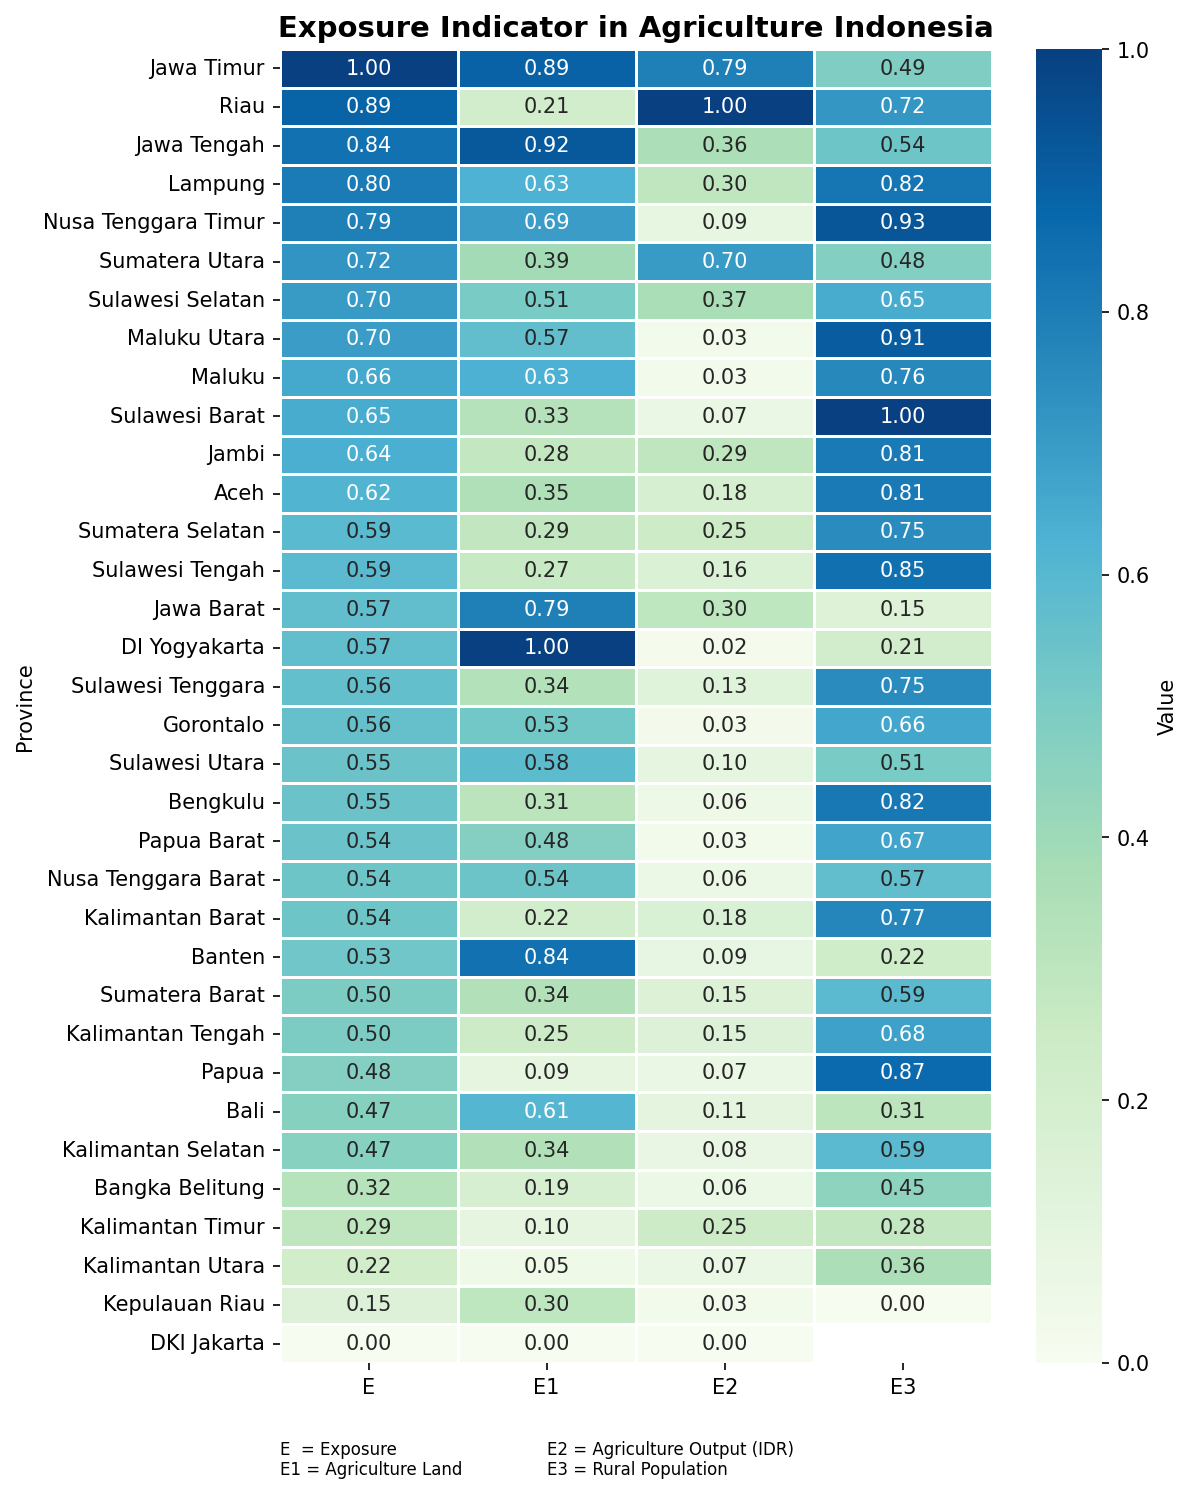

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df_heatmap = E[['Province', 'E', 'E1', 'E2', 'E3']]
df_heatmap = df_heatmap.sort_values(by='E', ascending=False).set_index('Province')

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 10), dpi=150)
sns.heatmap(df_heatmap, 
            cmap="GnBu",          # colormap
            annot=True,           # show numbers in cells
            fmt=".2f",            # formatting for numbers
            linewidths=0.5,       # <-- space between cells
            linecolor="white",    # <-- color of the space
            cbar_kws={'label': 'Value'})  

ax.set_title("Exposure Indicator in Agriculture Indonesia", fontsize=14, fontweight='bold')

xlabels = ['AC', 'Farmers Group per 1000 Farmers', 'Officers per 1000 Farmers',
           'Use Technology (%)', 'Urban Farming per Capita', 'Irrigated Wetlands (%)',
           'Available Financial System (%)', 'Independent of Agriculture (%)']

# add information on x-axis below the heatmap
# Left column
ax.text(0.0, 36,
        "E  = Exposure\n"
        "E1 = Agriculture Land",
        ha='left', va='top', fontsize=8,
        transform=ax.transData)

# # Right column
ax.text(1.5, 36,   # adjust x offset to control spacing between columns
        "E2 = Agriculture Output (IDR)\n"
        "E3 = Rural Population",
        ha='left', va='top', fontsize=8,
        transform=ax.transData)

fig.tight_layout()
fig.savefig(r"result\Exposure.png", dpi=300, bbox_inches='tight')
plt.show()